In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


# Training with CNN

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/media/shuvendu/Projects/Datasets/jaffe/train'
test_dir ='/media/shuvendu/Projects/Datasets/jaffe/test'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=32
)

Found 147 images belonging to 7 classes.
Found 66 images belonging to 7 classes.


In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 173056)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               44302592  
__________

In [5]:
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 5,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/30
5/5 [==============================] - 2s - loss: 6.6980 - acc: 0.1185 - val_loss: 1.9282 - val_acc: 0.1875
Epoch 2/30
5/5 [==============================] - 0s - loss: 2.1961 - acc: 0.2152 - val_loss: 1.8995 - val_acc: 0.1471
Epoch 3/30
5/5 [==============================] - 0s - loss: 1.9518 - acc: 0.2897 - val_loss: 1.8315 - val_acc: 0.2059
Epoch 4/30
5/5 [==============================] - 0s - loss: 1.6911 - acc: 0.3674 - val_loss: 1.6671 - val_acc: 0.3529
Epoch 5/30
5/5 [==============================] - 0s - loss: 1.3433 - acc: 0.5910 - val_loss: 2.0934 - val_acc: 0.3235
Epoch 6/30
5/5 [==============================] - 0s - loss: 1.3919 - acc: 0.4562 - val_loss: 1.2918 - val_acc: 0.5882
Epoch 7/30
5/5 [==============================] - 0s - loss: 0.8643 - acc: 0.7341 - val_loss: 1.0701 - val_acc: 0.6176
Epoch 8/30
5/5 [==============================] - 0s - loss: 0.6623 - acc: 0.7884 - val_loss: 1.5284 - val_acc: 0.4412
Epoch 9/30
5/5 [==============================] 

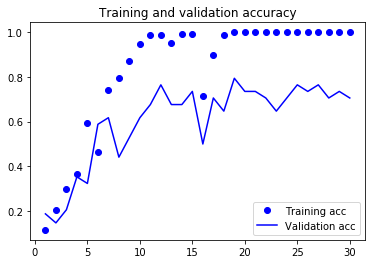

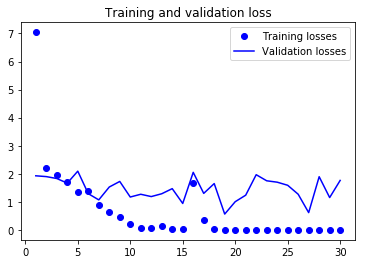

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Try using pretrined model

In [7]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

In [8]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 3591      
Total params: 27,563,847
Trainable params: 27,563,847
Non-trainable params: 0
_________________________________________________________________


In [9]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=5, 
                              epochs=5, 
                              validation_data=validation_generator, 
                              validation_steps=2)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/5
5/5 [==============================] - 10s - loss: 1.9943 - categorical_accuracy: 0.1855 - val_loss: 1.9289 - val_categorical_accuracy: 0.1176
Epoch 2/5
5/5 [==============================] - 3s - loss: 1.8950 - categorical_accuracy: 0.1883 - val_loss: 1.7710 - val_categorical_accuracy: 0.4412
Epoch 3/5
5/5 [==============================] - 3s - loss: 1.6625 - categorical_accuracy: 0.4415 - val_loss: 1.5457 - val_categorical_accuracy: 0.4706
Epoch 4/5
5/5 [==============================] - 3s - loss: 1.5374 - categorical_accuracy: 0.4189 - val_loss: 1.4323 - val_categorical_accuracy: 0.5000
Epoch 5/5
5/5 [==============================] - 3s - loss: 1.1981 - categorical_accuracy: 0.6163 - val_loss: 1.3419 - val_categorical_accuracy: 0.4412


In [10]:
conv_base = model.layers[0]

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [11]:
model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=5, 
                              epochs=15, 
                              validation_data=validation_generator, 
                              validation_steps=2)

Epoch 1/15
5/5 [==============================] - 2s - loss: 0.9619 - categorical_accuracy: 0.6714 - val_loss: 1.2671 - val_categorical_accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 1s - loss: 0.7384 - categorical_accuracy: 0.7531 - val_loss: 0.7313 - val_categorical_accuracy: 0.7647
Epoch 3/15
5/5 [==============================] - 1s - loss: 0.4498 - categorical_accuracy: 0.9140 - val_loss: 0.5204 - val_categorical_accuracy: 0.8235
Epoch 4/15
5/5 [==============================] - 1s - loss: 0.3027 - categorical_accuracy: 0.9231 - val_loss: 0.3552 - val_categorical_accuracy: 0.8824
Epoch 5/15
5/5 [==============================] - 1s - loss: 0.2079 - categorical_accuracy: 0.9683 - val_loss: 0.4555 - val_categorical_accuracy: 0.7941
Epoch 6/15
5/5 [==============================] - 1s - loss: 0.1772 - categorical_accuracy: 0.9711 - val_loss: 0.6911 - val_categorical_accuracy: 0.7647
Epoch 7/15
5/5 [==============================] - 1s - loss: 0.1049 - categorical_

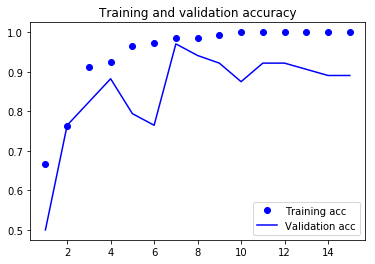

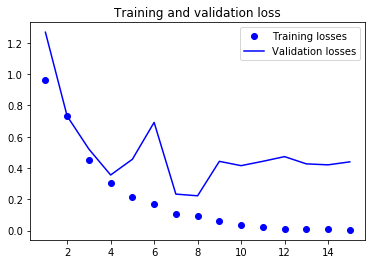

In [12]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
model.save('fully_trained_model.h5')

In [14]:
from keras.models import load_model
model = load_model('fully_trained_model.h5')